<a href="https://colab.research.google.com/github/Joshitha475/ML-labs/blob/main/ML_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Serial Number  Country  Total Cases Total Deaths Total Recovered  \
0              1      USA  104,196,861    1,132,935     101,322,779   
1              2    India   44,682,784      530,740      44,150,289   
2              3   France   39,524,311      164,233      39,264,546   
3              4  Germany   37,779,833      165,711      37,398,100   
4              5   Brazil   36,824,580      697,074      35,919,372   

  Active Cases     Total Test     Population  
0    1,741,147  1,159,832,679    334,805,269  
1        1,755    915,265,788  1,406,631,776  
2       95,532    271,490,188     65,584,518  
3      216,022    122,332,384     83,883,596  
4      208,134     63,776,166    215,353,593  
Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object
Mean squared error: 0.02127659574468085
Coefficient of determination 

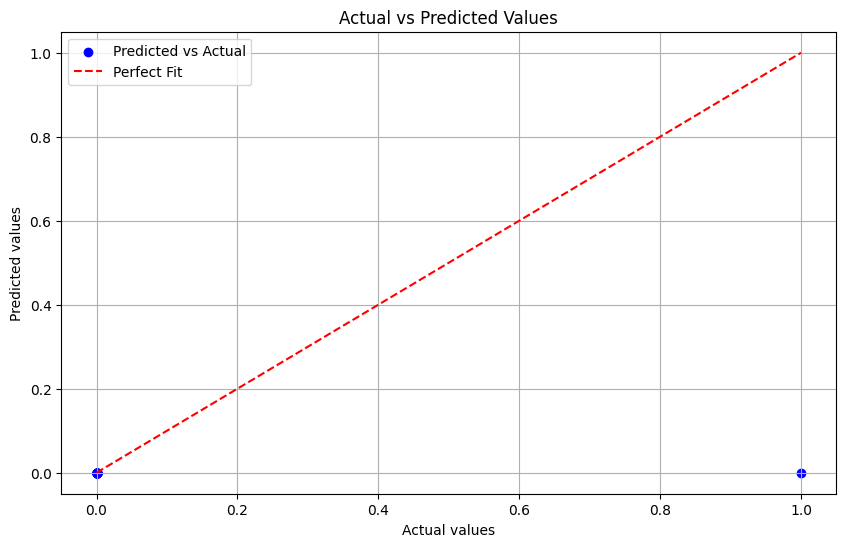

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a CSV file
file_path = '/content/covid_worldwide.csv'  # Replace with your dataset file path
data = pd.read_csv(file_path)

# Inspect the first few rows and the data types
print(data.head())
print(data.dtypes)

# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data)

# Separate features and target variable
X = data_encoded.iloc[:, :-1]  # All columns except the last one
y = data_encoded.iloc[:, -1]   # The last column (target variable)

# Ensure that y is numeric (if y is a categorical target, convert it to numeric)
if y.dtype == 'object':
    y = pd.factorize(y)[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean squared error:", mean_squared_error(y_test, y_pred))
print("Coefficient of determination (R^2 score):", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

